# Sales Analysis

### Import necessary libraries

In [ ]:
pip install missingno

In [68]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Merge all data in a single CSV

In [9]:
path = r'C:\Users\Sumon\Downloads\Sales_data'
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

In [10]:
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [11]:
all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)

### Read updated DataFrame

In [12]:
all_data = pd.read_csv("all_data_copy.csv")
all_data[515:600]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
515,177051,Wired Headphones,2,11.99,04/07/19 08:41,"777 Adams St, Boston, MA 02215"
516,177052,USB-C Charging Cable,2,11.95,04/02/19 09:30,"532 Walnut St, San Francisco, CA 94016"
517,177053,Wired Headphones,1,11.99,04/24/19 20:45,"5 Adams St, Boston, MA 02215"
518,177054,Apple Airpods Headphones,1,150,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301"
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
595,177127,27in FHD Monitor,1,149.99,04/16/19 21:15,"469 6th St, Austin, TX 73301"
596,177128,Flatscreen TV,1,300,04/03/19 20:10,"162 14th St, Los Angeles, CA 90001"
597,177129,Apple Airpods Headphones,1,150,04/23/19 17:48,"474 Elm St, San Francisco, CA 94016"
598,177130,LG Washing Machine,1,600.0,04/01/19 08:43,"777 Center St, Los Angeles, CA 90001"


In [13]:
all_data.shape

(186850, 6)

### Clean up the Data!!!

#### Drop NAN

In [14]:
import missingno as msno

<AxesSubplot:>

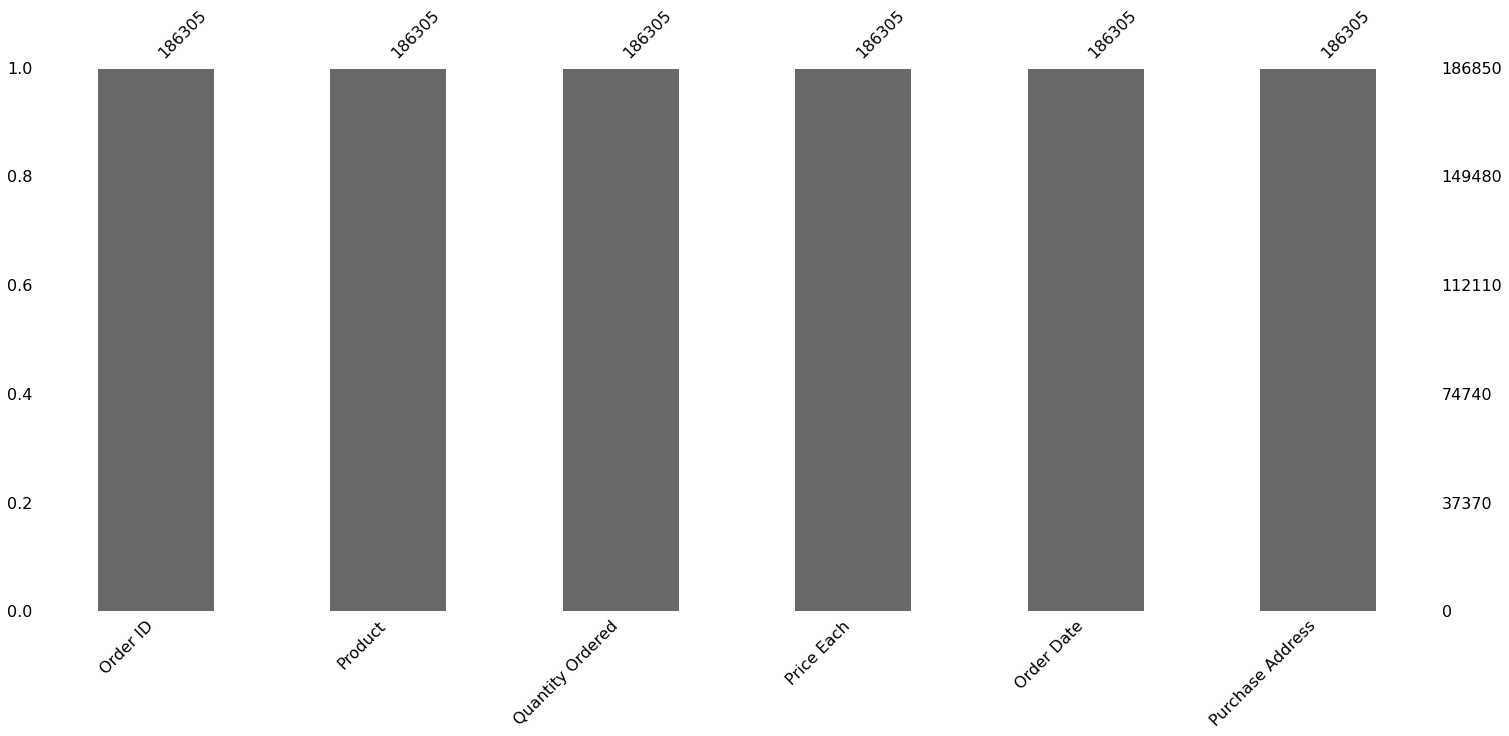

In [15]:
msno.bar(all_data)

In [16]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [17]:
all_data = all_data.dropna(how='all')

In [18]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [19]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [20]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

ValueError: Unable to parse string "Quantity Ordered" at position 517

In [21]:
all_data.drop(index = 517)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [22]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data['Quantity Ordered'])
all_data["Price Each"] = pd.to_numeric(all_data['Price Each'])

ValueError: Unable to parse string "Quantity Ordered" at position 517

In [23]:
all_data.iloc[1155]

Order ID                                         177658
Product                                Wired Headphones
Quantity Ordered                                      1
Price Each                                        11.99
Order Date                               04/01/19 17:35
Purchase Address    38 11th St, San Francisco, CA 94016
Name: 1158, dtype: object

In [24]:
df = all_data[all_data["Quantity Ordered"] == "Quantity Ordered"]

In [28]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [25]:
all_data.drop(index=all_data[all_data["Quantity Ordered"] == "Quantity Ordered"].index, inplace=True)

In [26]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data['Quantity Ordered'])
all_data["Price Each"] = pd.to_numeric(all_data['Price Each'])

In [27]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [29]:
all_data["Month"] = pd.to_datetime(all_data["Order Date"]).dt.month

In [30]:
all_data["Month"]

0         4
2         4
3         4
4         4
5         4
         ..
186845    9
186846    9
186847    9
186848    9
186849    9
Name: Month, Length: 185950, dtype: int64

In [31]:
def get_city(address):
    return address.split(",")[1].strip()

def get_state(address):
    return address.split(",")[2].split(" ")[1]


all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

In [32]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles (CA)
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco (CA)
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco (CA)


Question 1: What was the best month for sales? How much was earned that month?
Question 2: What city sold the most product?
Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
Question 4: What products are most often sold together?

In [45]:
all_data["Sale"] = all_data["Quantity Ordered"].astype(int) * all_data["Price Each"]. astype(float) 

In [46]:
all_data["Sale"] 

0          23.90
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      8.97
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: Sale, Length: 185950, dtype: float64

In [55]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


In [61]:
Sales = all_data.groupby("Month").sum().reset_index()


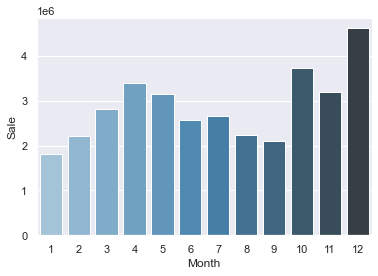

In [63]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.barplot(y="Sale", x="Month", data=Sales,  palette="Blues_d")

In [65]:
Most_product = all_data.groupby("City").count()["Product"].reset_index()
Most_product

,City,Product
0,Atlanta (GA),14881
1,Austin (TX),9905
2,Boston (MA),19934
3,Dallas (TX),14820
4,Los Angeles (CA),29605
5,New York City (NY),24876
6,Portland (ME),2455
7,Portland (OR),10010
8,San Francisco (CA),44732
9,Seattle (WA),14732


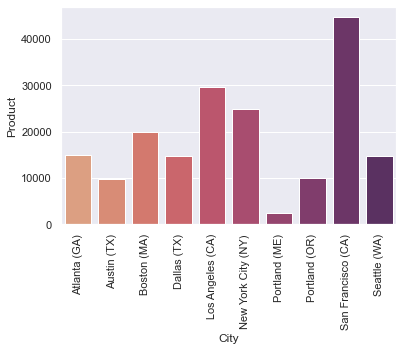

In [72]:
sns.set_theme(style="darkgrid")
ax = sns.barplot(y="Product", x="City", data= Most_product,  palette="flare")
ax.set_xticklabels(Most_product["City"],rotation=90)
plt.show()

In [73]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sale,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27


In [76]:
all_data[all_data["Hour"] == 0]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sale,Hour,Minute
20,176575,AAA Batteries (4-pack),1,2.99,04/27/19 00:30,"433 Hill St, New York City, NY 10001",4,New York City (NY),2.99,0,30
25,176580,USB-C Charging Cable,1,11.95,04/05/19 00:35,"886 Willow St, Los Angeles, CA 90001",4,Los Angeles (CA),11.95,0,35
57,176610,AAA Batteries (4-pack),1,2.99,04/26/19 00:40,"382 River St, Dallas, TX 75001",4,Dallas (TX),2.99,0,40
114,176667,27in 4K Gaming Monitor,1,389.99,04/11/19 00:39,"92 11th St, Los Angeles, CA 90001",4,Los Angeles (CA),389.99,0,39
124,176676,LG Dryer,1,600.00,04/09/19 00:35,"788 Lincoln St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,0,35
...,...,...,...,...,...,...,...,...,...,...,...
186774,259289,ThinkPad Laptop,1,999.99,09/25/19 00:42,"259 Dogwood St, Los Angeles, CA 90001",9,Los Angeles (CA),999.99,0,42
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,Atlanta (GA),11.99,0,25
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,Atlanta (GA),5.98,0,25
186827,259336,AAA Batteries (4-pack),3,2.99,09/25/19 00:13,"753 14th St, Boston, MA 02215",9,Boston (MA),8.97,0,13


In [81]:
shop_Most_product = all_data.groupby("Hour").count()["Product"].reset_index()

<AxesSubplot:xlabel='Hour', ylabel='Product'>

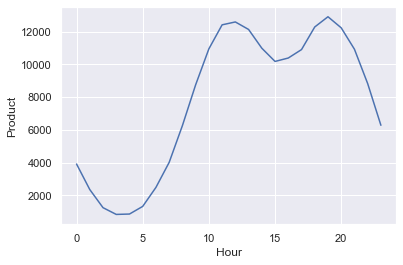

In [82]:
plt.grid
sns.lineplot(data=shop_Most_product, x="Hour", y="Product")

In [86]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df["Grouped"] = df.groupby(["Order ID"])["Product"].transform(lambda x: ",".join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

<ipython-input-86-499c82577ebf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby(["Order ID"])["Product"].transform(lambda x: ",".join(x))


In [87]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [88]:
df1 = all_data.groupby("Product").sum()["Quantity Ordered"].reset_index()

In [89]:
df1

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


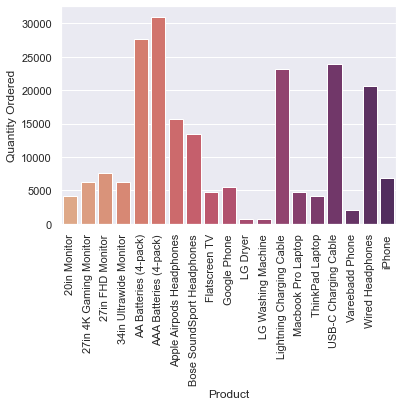

In [91]:
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Product", y="Quantity Ordered", data= df1,  palette="flare")
ax.set_xticklabels(df1["Product"],rotation=90)
plt.show()

In [92]:
df2 = all_data.groupby("Product").mean()["Price Each"].reset_index()

In [93]:
df2

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


<ipython-input-99-fcea33682fa4>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df1["Product"], rotation='vertical', size=10)
<ipython-input-99-fcea33682fa4>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


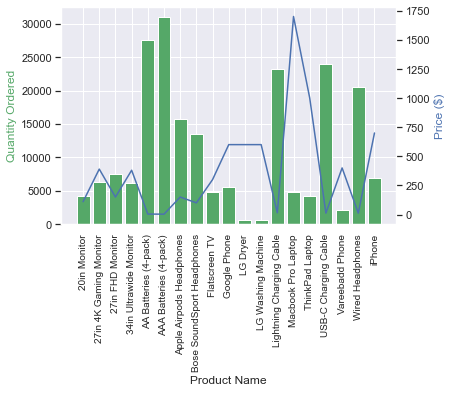

In [99]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(df1["Product"],df1["Quantity Ordered"], color='g')
ax2.plot(df2["Product"],df2["Price Each"],color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(df1["Product"], rotation='vertical', size=10)
plt.grid(False)

fig.show()